In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

In [ ]:
df_cluster = pd.read_csv('bank_marketing_dataset.csv')

In [ ]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

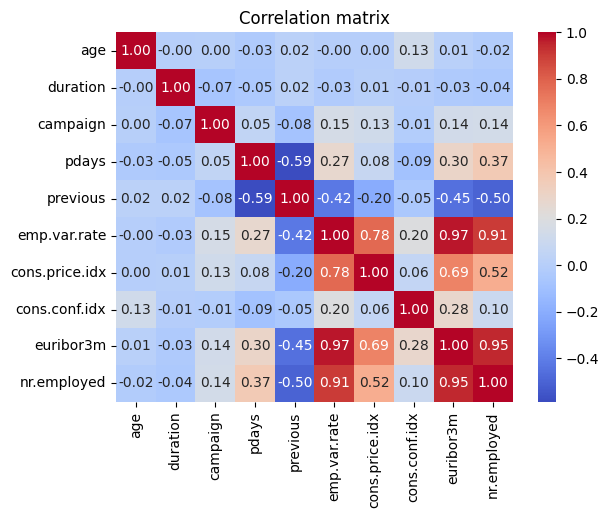

In [ ]:
# Correlation matrix
corr = df_cluster[numerical_cols_c].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [ ]:
df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

In [ ]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Selecting continuous variables
X_cluster = X_preprocessed_df.copy()

# Removing one-hot encoded variables
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]
X_cluster = X_preprocessed_df.drop(one_hot_cols, axis=1)


**Iterating over different numbers of clusters**

In [ ]:
 #Initializing lists to store evaluation metrics
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterating over different numbers of clusters
for k in range(2, 11):
    # Creating KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fitting KMeans to the data
    kmeans.fit(X_cluster)

    # Calculating evaluation metrics
    silhouette.append(silhouette_score(X_cluster, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X_cluster, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(X_cluster, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Plotting evaluation metrics**

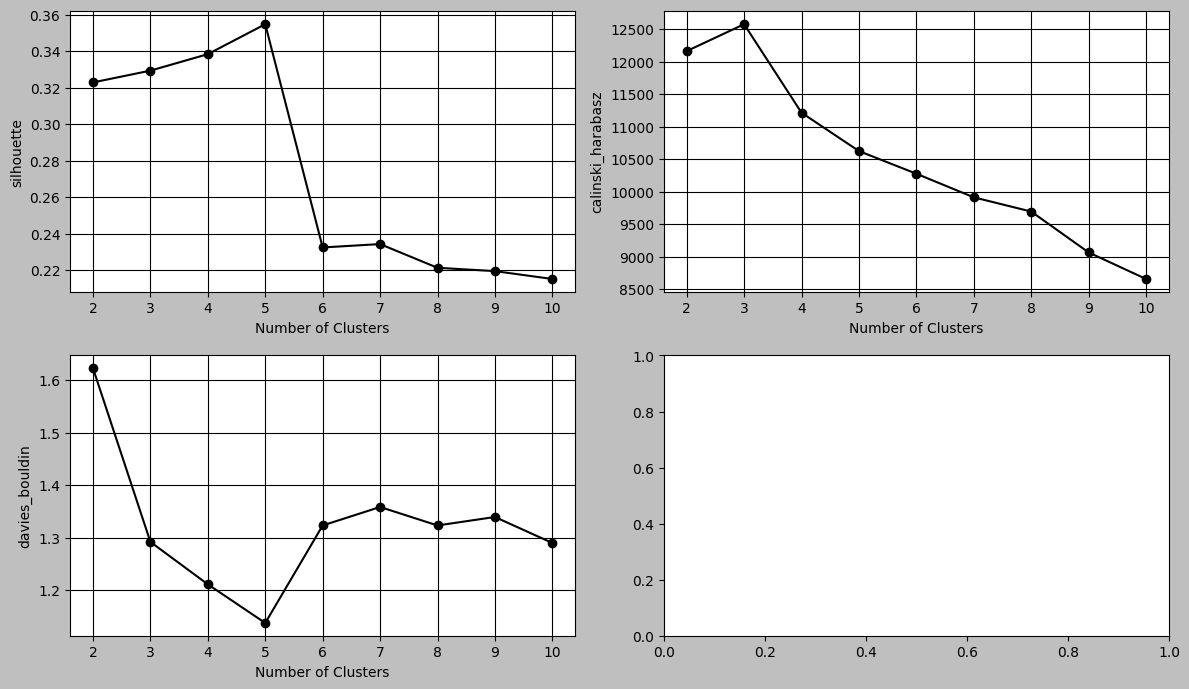

In [ ]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Print the silhouette score
print("Silhouette Score:", silhouette[np.argmax(silhouette)])

Silhouette Score: 0.3549102158414577


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Initialize lists to store evaluation metrics
silhouette = []
max_iter_values = range(90, 110, 1)

for i in max_iter_values:
    # Create KMeans object with a specific number of clusters and max_iter value
    kmeans = KMeans(n_clusters=5, random_state=1, max_iter=i)
    # Fit KMeans to the data
    kmeans.fit(X_cluster)
    # Calculate silhouette score
    score = silhouette_score(X_cluster, kmeans.labels_)
    silhouette.append(score)

# Store the silhouette scores and max_iter values in a DataFrame
df_silhouette = pd.DataFrame({'max_iter': max_iter_values, 'silhouette_score': silhouette})
print(df_silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

    max_iter  silhouette_score
0         90           0.35491
1         91           0.35491
2         92           0.35491
3         93           0.35491
4         94           0.35491
5         95           0.35491
6         96           0.35491
7         97           0.35491
8         98           0.35491
9         99           0.35491
10       100           0.35491
11       101           0.35491
12       102           0.35491
13       103           0.35491
14       104           0.35491
15       105           0.35491
16       106           0.35491
17       107           0.35491
18       108           0.35491
19       109           0.35491


In [ ]:
df_silhouette.max()

max_iter            109.00000
silhouette_score      0.35491
dtype: float64

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

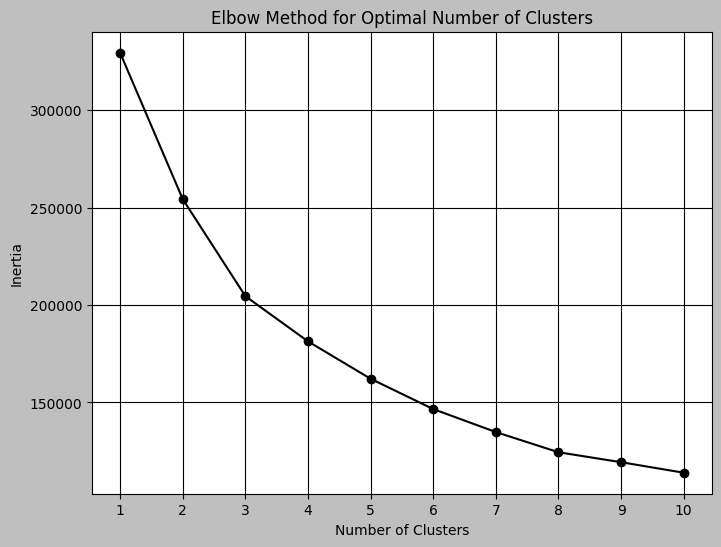

In [ ]:
# Initialize an empty list to store inertia (within-cluster sum of squares) values
inertia = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the KMeans model to the data
    kmeans.fit(X_cluster)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


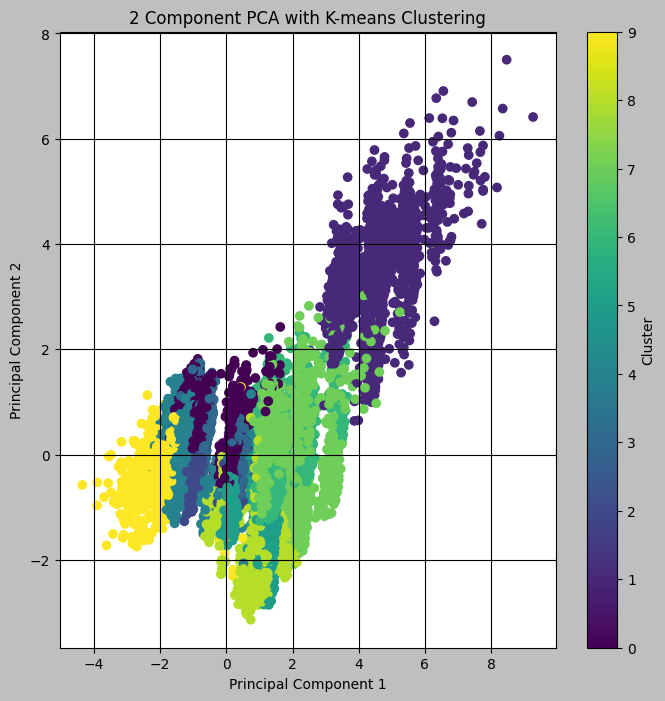

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Concatenate the principal components with the cluster labels
final_df1 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df1['principal component 1'], final_df1['principal component 2'], c=final_df1['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


**Fit KMeans with 3, 4 and 5 clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


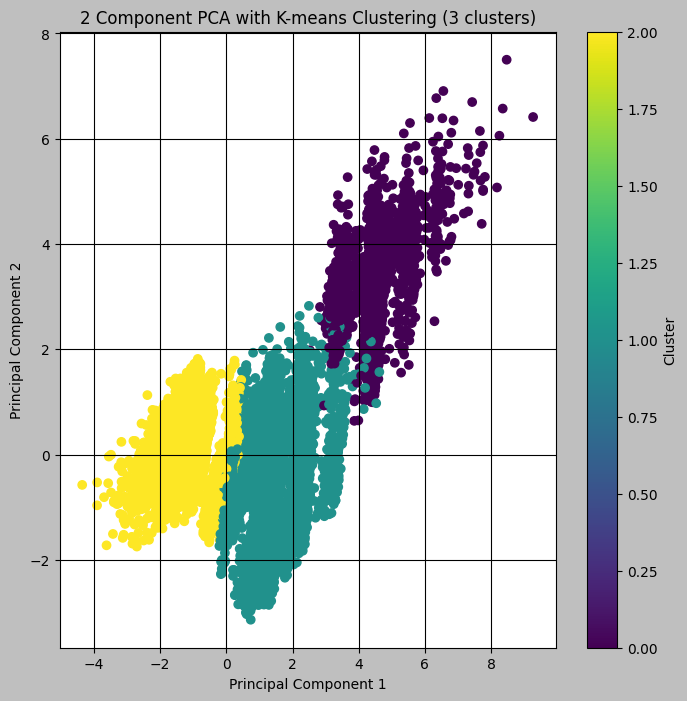

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df2 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df2['principal component 1'], final_df2['principal component 2'], c=final_df2['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (3 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


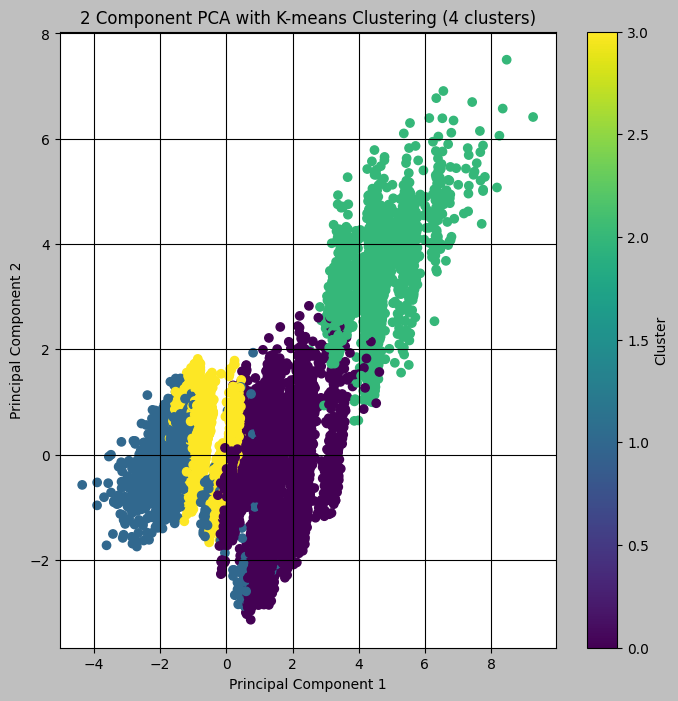

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df4 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df4['principal component 1'], final_df4['principal component 2'], c=final_df4['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (4 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


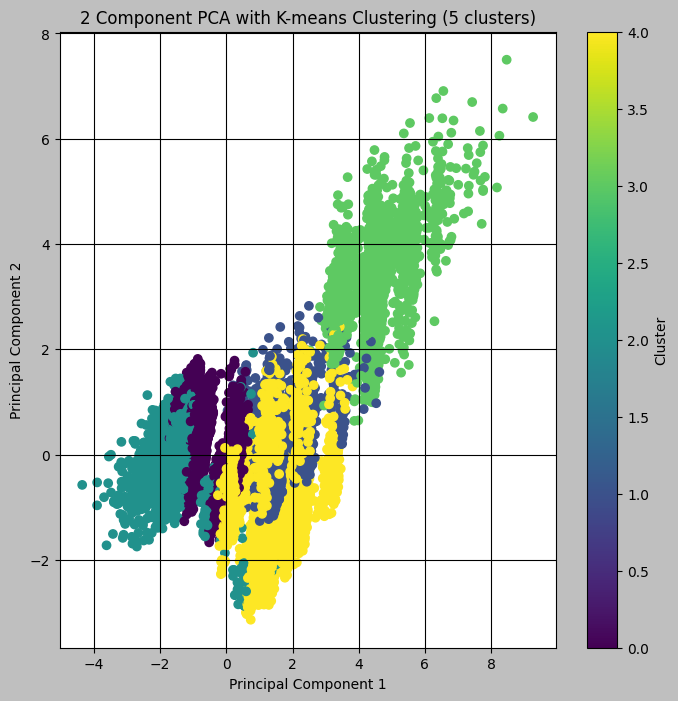

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<ipython-input-20-10191a4fa312>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=final_df, palette='deep')


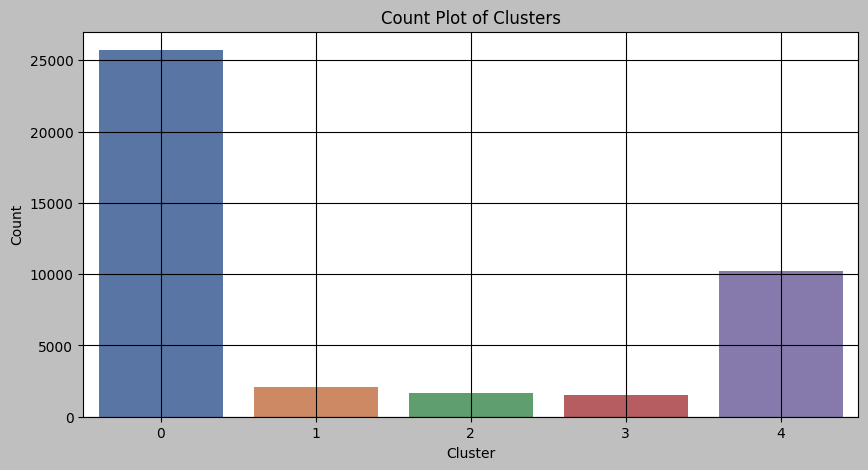

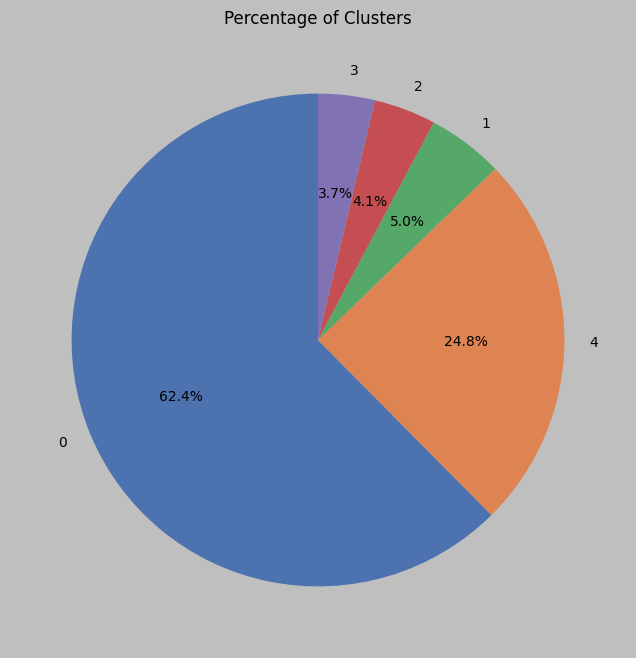

In [ ]:
import seaborn as sns

# Count Plot of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=final_df, palette='deep')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Percentage of Clusters
cluster_counts = final_df['cluster'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Percentage of Clusters')
plt.show()


Comparaison with 3 clusters

<ipython-input-21-10191a4fa312>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=final_df, palette='deep')


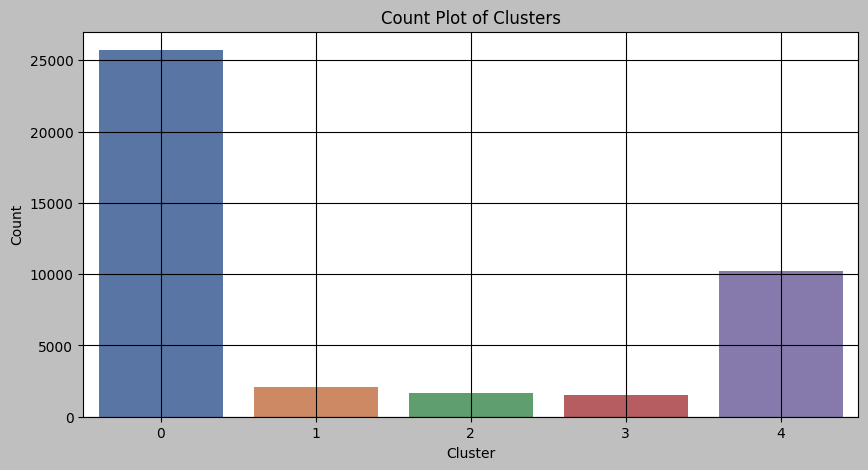

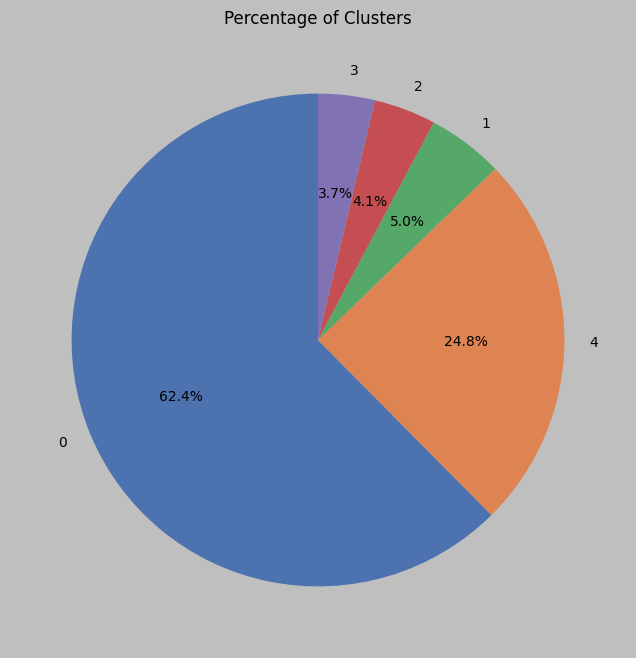

In [ ]:
import seaborn as sns

# Count Plot of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=final_df, palette='deep')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Percentage of Clusters
cluster_counts = final_df['cluster'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Percentage of Clusters')
plt.show()


**Interpretation of clusters**

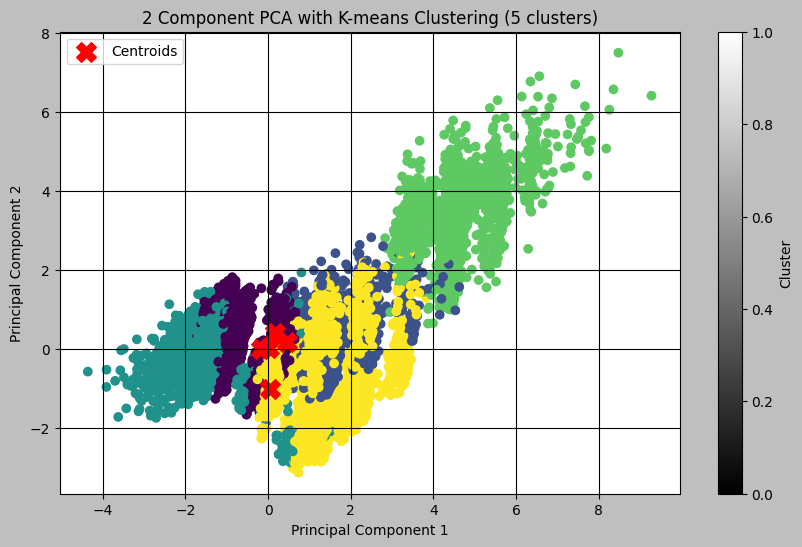

In [ ]:
# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize centroids
plt.figure(figsize=(10, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-23-df93f0369a3a>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')


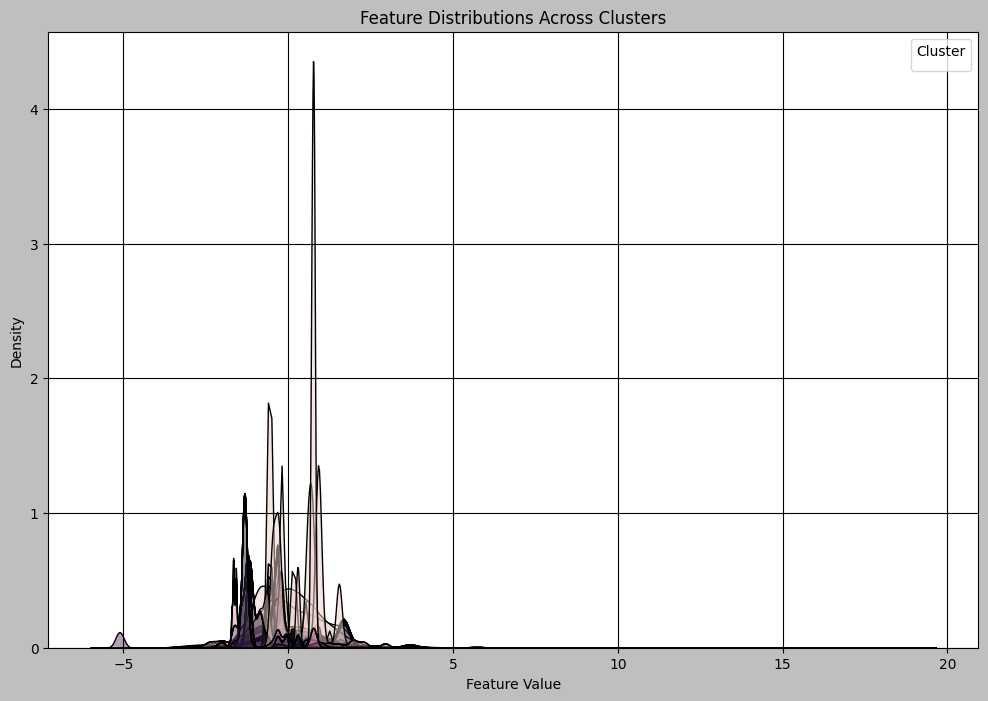

In [ ]:
# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize feature distributions across clusters
plt.figure(figsize=(12, 8))
for column in cluster_means.columns:
    sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')
plt.title('Feature Distributions Across Clusters')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1)

# Fit KMeans to the data
kmeans.fit(X_cluster)

# Get labels
labels = kmeans.labels_

# Print evaluation metrics
print('Silhouette Score:', silhouette_score(X_cluster, labels))
print('Calinski Harabasz Score:', calinski_harabasz_score(X_cluster, labels))
print('Davies Bouldin Score:', davies_bouldin_score(X_cluster, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3549102158414577
Calinski Harabasz Score: 10622.31219596036
Davies Bouldin Score: 1.1374115554064925


In [ ]:
# Analyzing the clusters
kmeans_df = df_cluster.copy()
kmeans_df['cluster'] = kmeans.labels_

In [ ]:
# Group by cluster and describe
cluster_stats = kmeans_df.groupby('cluster').describe()
print(cluster_stats)

             age                                                     duration  \
           count       mean        std   min   25%   50%   75%   max    count   
cluster                                                                         
0        25712.0  40.199790   9.368955  18.0  33.0  39.0  47.0  89.0  25712.0   
1         2058.0  44.927600  16.521141  17.0  31.0  41.0  58.0  98.0   2058.0   
2         1674.0  40.512545   9.553143  20.0  33.0  39.0  48.0  75.0   1674.0   
3         1531.0  41.883736  15.295377  17.0  30.0  37.0  52.0  98.0   1531.0   
4        10213.0  38.234701  10.166150  18.0  31.0  36.0  44.0  95.0  10213.0   

                                                                   campaign  \
               mean         std   min    25%    50%    75%     max    count   
cluster                                                                       
0        260.915254  266.505377   2.0  104.0  177.0  317.0  4918.0  25712.0   
1        274.474733  245.217801  10

In [ ]:
# Scaled data
kmeans_scaled = X_cluster.copy()
kmeans_scaled['cluster'] = kmeans.labels_


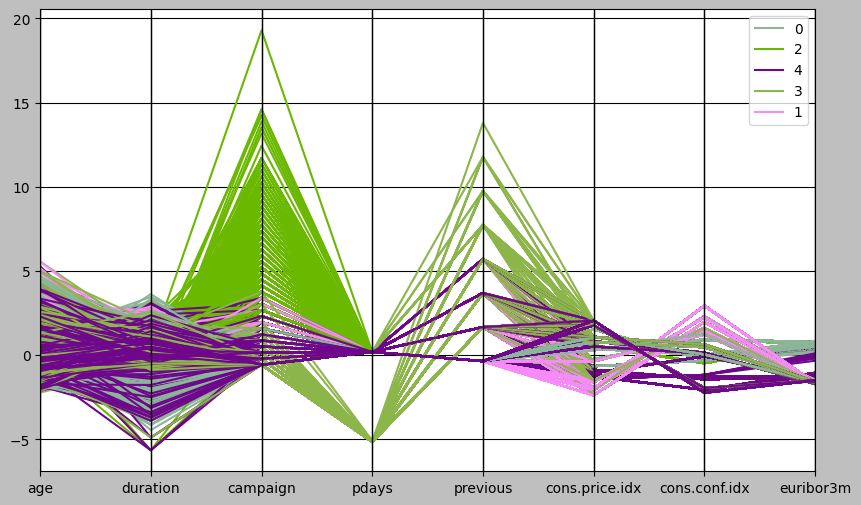

In [ ]:
from pandas.plotting import parallel_coordinates
# Parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(kmeans_scaled.assign(cluster=kmeans_scaled['cluster'].astype(str)), 'cluster')
plt.show()

<Figure size 1200x800 with 0 Axes>

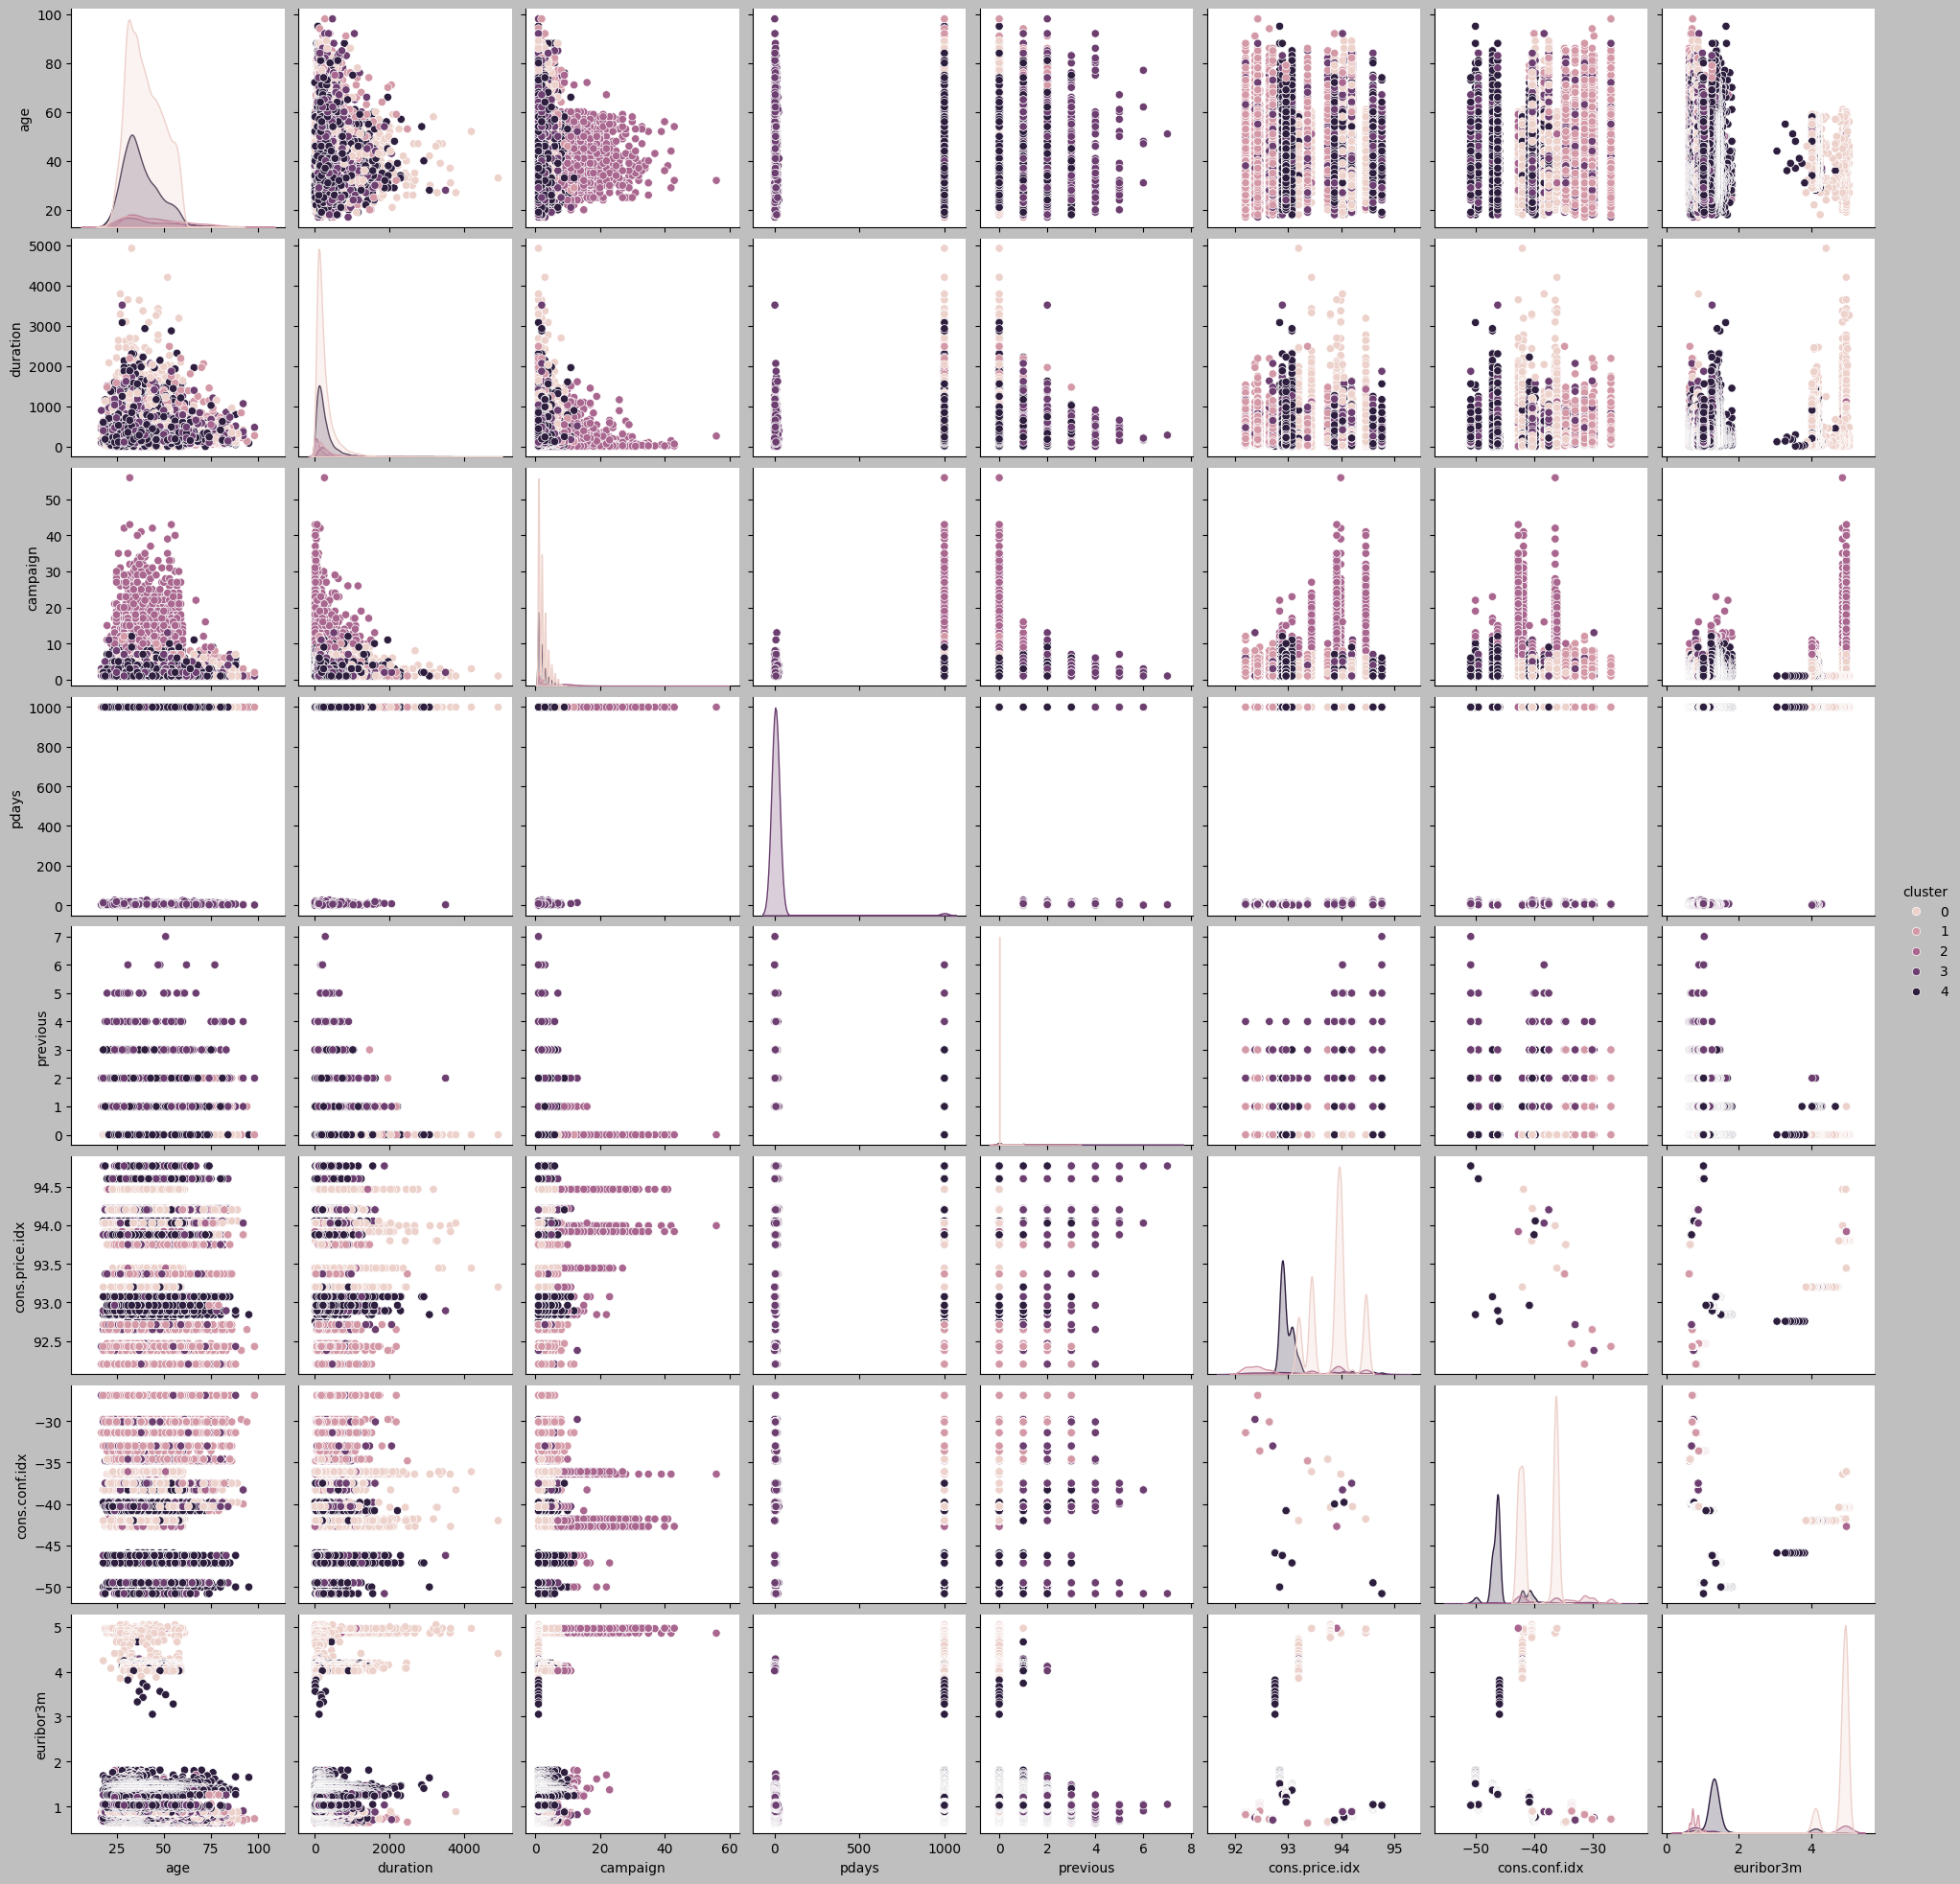

In [ ]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(kmeans_df, hue='cluster')
plt.show()

In [ ]:
# Get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_cluster.columns)

In [ ]:
# Print centroids
print('Centroids:')
print(centroids)

Centroids:
        age  duration  campaign     pdays  previous  cons.price.idx  \
0  0.016863  0.031613 -0.130942  0.195414 -0.349337        0.488516   
1  0.470538  0.185626 -0.264200  0.195414  0.379032       -1.733483   
2  0.046874 -1.006070  3.599966  0.195414 -0.330181        0.585536   
3  0.178453  0.392122 -0.267160 -5.061743  3.059577       -0.389165   
4 -0.171705 -0.010871 -0.167121  0.195414  0.398572       -0.918203   

   cons.conf.idx  euribor3m  
0       0.249797   0.665962  
1       2.034932  -1.633401  
2       0.063201   0.652551  
3       0.464342  -1.520274  
4      -1.118906  -1.226525  


In [ ]:
# Print unscaled centroids
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_cluster.columns)
print('Unscaled Centroids:')
print(centroids_unscaled)

Unscaled Centroids:
         age  duration   campaign       pdays  previous  cons.price.idx  \
0  40.199790  5.202023   2.204885  999.000000  0.000078       93.858434   
1  44.927600  5.343241   1.835763  999.000000  0.360544       92.572267   
2  40.512545  4.250543  12.539427  999.000000  0.009558       93.914592   
3  41.883736  5.532583   1.827564   16.391901  1.687133       93.350403   
4  38.234701  5.163067   2.104671  999.000000  0.370214       93.044178   

   cons.conf.idx  euribor3m  
0     -39.346504   4.776353  
1     -31.084645   0.788277  
2     -40.210096   4.753093  
3     -38.353560   0.984487  
4     -45.681054   1.493973  


In [ ]:
# Add cluster labels to main dataset
df_cluster['cluster'] = kmeans.labels_

# Print cluster counts for each categorical variable
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size())

# Print same thing but as percentage of total cluster size
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size() / df_cluster.groupby('cluster').size())


cluster  job          
0        admin.           6329
         blue-collar      6034
         entrepreneur      963
         housemaid         762
         management       1834
         retired           800
         self-employed     899
         services         2536
         student           207
         technician       4526
         unemployed        591
         unknown           231
1        admin.            624
         blue-collar       123
         entrepreneur       41
         housemaid          60
         management        151
         retired           366
         self-employed      77
         services           71
         student           153
         technician        284
         unemployed         87
         unknown            21
2        admin.            461
         blue-collar       364
         entrepreneur       57
         housemaid          55
         management        103
         retired            58
         self-employed      60
         service

## **Final Code - 5 clusters**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Selecting continuous variables
X_cluster = X_preprocessed_df.copy()

# Removing one-hot encoded variables
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]
X_cluster = X_preprocessed_df.drop(one_hot_cols, axis=1)

In [ ]:
 #Initializing lists to store evaluation metrics
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterating over different numbers of clusters
for k in range(2, 11):
    # Creating KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fitting KMeans to the data
    kmeans.fit(X_cluster)

    # Calculating evaluation metrics
    silhouette.append(silhouette_score(X_cluster, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X_cluster, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(X_cluster, kmeans.labels_))

In [ ]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Initialize lists to store evaluation metrics
silhouette = []
max_iter_values = range(90, 110, 1)

for i in max_iter_values:
    # Create KMeans object with a specific number of clusters and max_iter value
    kmeans = KMeans(n_clusters=5, random_state=1, max_iter=i)
    # Fit KMeans to the data
    kmeans.fit(X_cluster)
    # Calculate silhouette score
    score = silhouette_score(X_cluster, kmeans.labels_)
    silhouette.append(score)

# Store the silhouette scores and max_iter values in a DataFrame
df_silhouette = pd.DataFrame({'max_iter': max_iter_values, 'silhouette_score': silhouette})
print(df_silhouette)

In [ ]:
df_silhouette.max()

In [ ]:
# Initialize an empty list to store inertia (within-cluster sum of squares) values
inertia = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the KMeans model to the data
    kmeans.fit(X_cluster)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

# Count Plot of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=final_df, palette='deep')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Percentage of Clusters
cluster_counts = final_df['cluster'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Percentage of Clusters')
plt.show()

In [ ]:
# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize centroids
plt.figure(figsize=(10, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize feature distributions across clusters
plt.figure(figsize=(12, 8))
for column in cluster_means.columns:
    sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')
plt.title('Feature Distributions Across Clusters')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1)

# Fit KMeans to the data
kmeans.fit(X_cluster)

# Get labels
labels = kmeans.labels_

# Print evaluation metrics
print('Silhouette Score:', silhouette_score(X_cluster, labels))
print('Calinski Harabasz Score:', calinski_harabasz_score(X_cluster, labels))
print('Davies Bouldin Score:', davies_bouldin_score(X_cluster, labels))

In [ ]:
# Analyzing the clusters
kmeans_df = df_cluster.copy()
kmeans_df['cluster'] = kmeans.labels_

In [ ]:
# Group by cluster and describe
cluster_stats = kmeans_df.groupby('cluster').describe()
print(cluster_stats)

In [ ]:
# Scaled data
kmeans_scaled = X_cluster.copy()
kmeans_scaled['cluster'] = kmeans.labels_

In [ ]:
from pandas.plotting import parallel_coordinates
# Parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(kmeans_scaled.assign(cluster=kmeans_scaled['cluster'].astype(str)), 'cluster')
plt.show()

In [ ]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(kmeans_df, hue='cluster')
plt.show()

In [ ]:
# Get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_cluster.columns)

In [ ]:
# Print centroids
print('Centroids:')
print(centroids)

In [ ]:
# Print unscaled centroids
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_cluster.columns)
print('Unscaled Centroids:')
print(centroids_unscaled)

In [ ]:
# Add cluster labels to main dataset
df_cluster['cluster'] = kmeans.labels_

# Print cluster counts for each categorical variable
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size())

# Print same thing but as percentage of total cluster size
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size() / df_cluster.groupby('cluster').size())
